In [1]:
#Importing the libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
# Loading Excel as text
df_raw = pd.read_excel("Heart Attack Data Set spreadsheet.xlsx", header=None)

In [17]:
#Splitting the first row which contains column names
if df.shape[1] ==1:
    df = df_raw[0].str.split(",", expand=True)

# Converting all values to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Assigning column names
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

#Checking the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Separate features and target
X = df.drop("target", axis=1).values  # all columns except 'target'
y = df["target"].values              # the target column

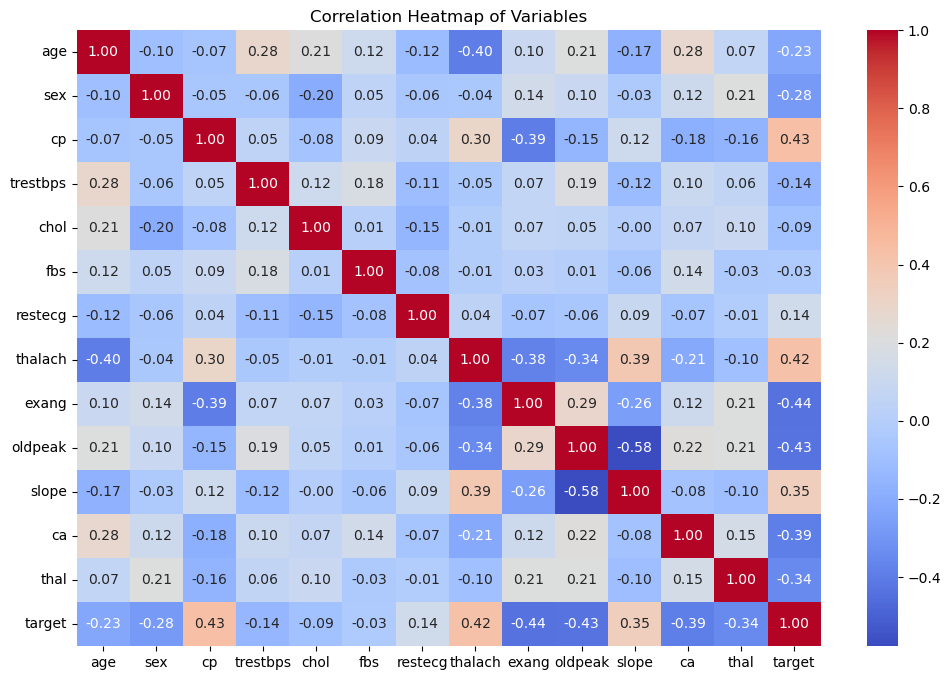

In [31]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Variables")
plt.savefig("heatmap.png", dpi=200, bbox_inches="tight")
plt.show()

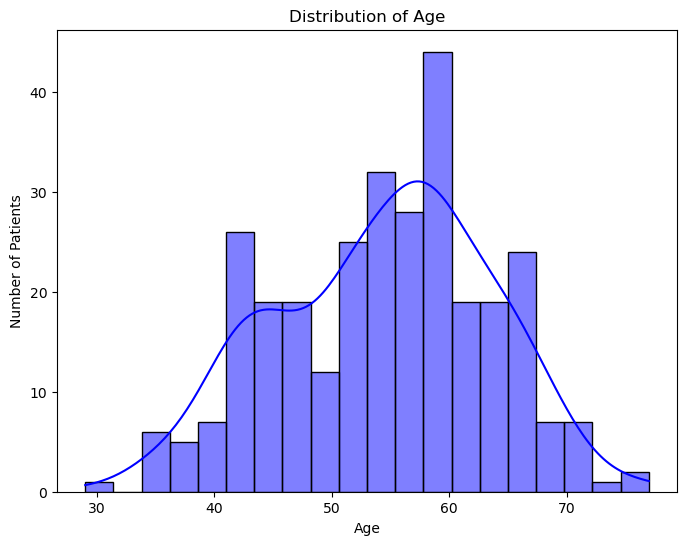

In [38]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.savefig("distribution_of_age.png", dpi=200, bbox_inches="tight")
plt.show()

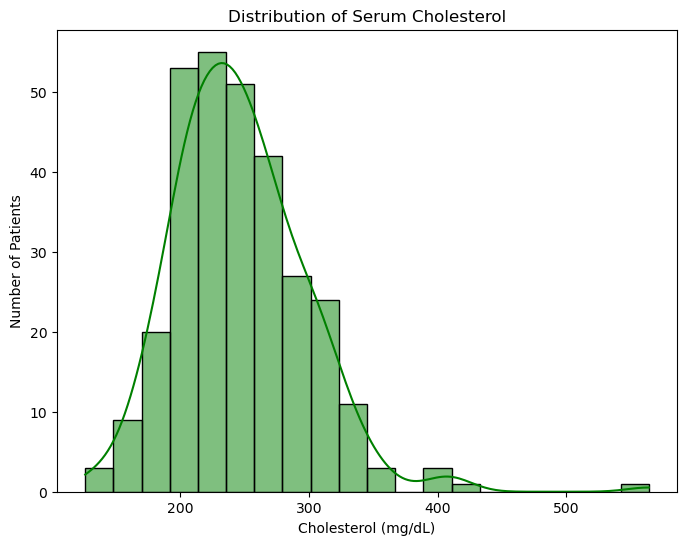

In [33]:
# Distribution of Cholesterol
plt.figure(figsize=(8, 6))
sns.histplot(df['chol'], bins=20, kde=True, color="green")
plt.title("Distribution of Serum Cholesterol")
plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Number of Patients")
plt.savefig("distribution_of_cholesterol.png", dpi=200, bbox_inches="tight")
plt.show()

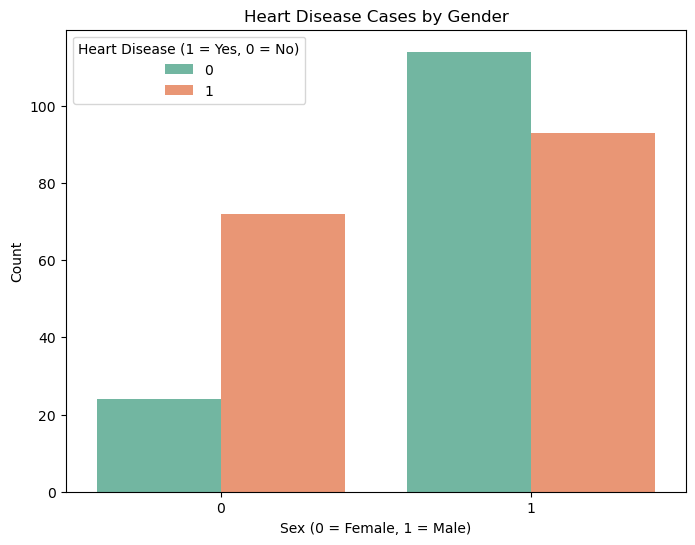

In [34]:
# Heart Disease Cases by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x="sex", hue="target", data=df, palette="Set2")
plt.title("Heart Disease Cases by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease (1 = Yes, 0 = No)")
plt.savefig("heart_disease_by_gender.png", dpi=200, bbox_inches="tight")
plt.show()

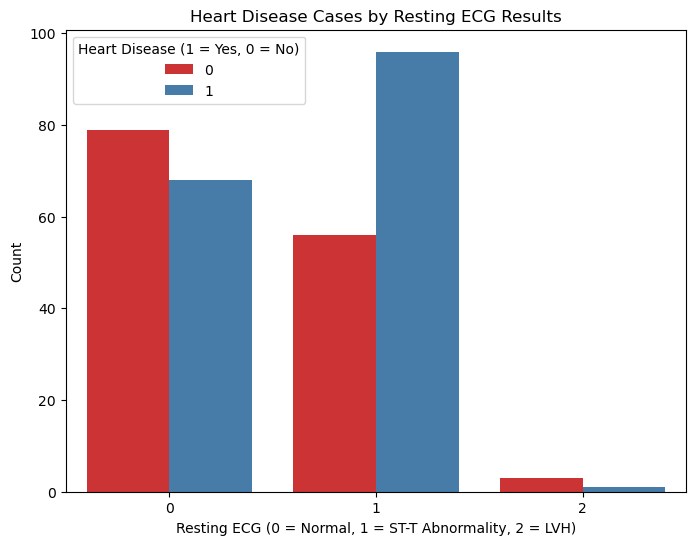

In [35]:
# Heart Disease Cases by Resting ECG
plt.figure(figsize=(8, 6))
sns.countplot(x="restecg", hue="target", data=df, palette="Set1")
plt.title("Heart Disease Cases by Resting ECG Results")
plt.xlabel("Resting ECG (0 = Normal, 1 = ST-T Abnormality, 2 = LVH)")
plt.ylabel("Count")
plt.legend(title="Heart Disease (1 = Yes, 0 = No)")
plt.savefig("heart_disease_by_ECG.png", dpi=200, bbox_inches="tight")
plt.show()

In [24]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [27]:
# Predictions
y_pred = log_reg.predict(X_test_scaled)

In [28]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7582417582417582


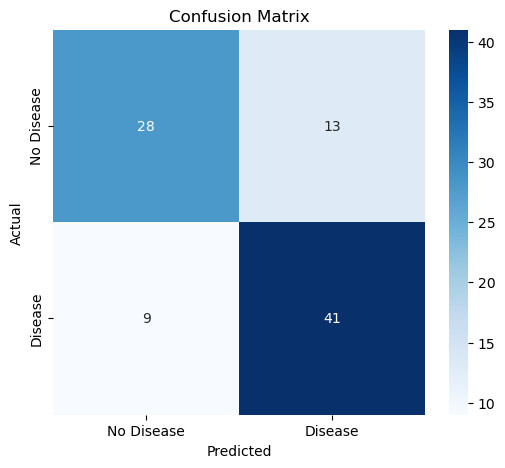

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=200, bbox_inches="tight")
plt.show()

In [30]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

Classification Report:
              precision    recall  f1-score   support

           0      0.757     0.683     0.718        41
           1      0.759     0.820     0.788        50

    accuracy                          0.758        91
   macro avg      0.758     0.751     0.753        91
weighted avg      0.758     0.758     0.757        91

